Comments to:

*Mehran Ghasabeh \
Chair of Soil Mechanics and Foundation Engineering \
Geotechnical Institute \
Technische Universität Bergakademie Freiberg.*

# Blocking and Conducting Fractures

The liquid flow in fractured porous media, such as geomaterials including rock, granular materials, and solid and industrial waste, is an essential and interdisciplinary topic that is closely related to a variety of scientific and technical areas, such as hydrology, rock mechanics, geothermal engineering, and earth sciences [1]. The geometrically anisotropic inclusions and the discontinuities, generally called fractures, dominate the liquid flow characteristics in porous media. In general, fractures can act as both passageways and obstacles, drastically altering flow patterns[2]. Therefore, the flow of liquid in a porous medium that is fractured, or fracturing, can be divided into two distinct subproblems: the flow of liquid in the fractures that separate the intact sections of the porous medium and the interstitial flow in the pores of the intact parts, which are called the blocking and the conducting fractures, respectively [3].

# Problem Description

The current benchmark test addressing liquid flow in a porous medium considers a 2D square solid domain containing blocking and conducting fractures. The blocking fracture is represented by the geometrical discontinuity in the center of the plate that prevents liquid from passing through, and the conducting fracture which depicted by a physically inclined line in the upper part of the domain. The geometrical configuration and boundary conditions are displayed in Fig 1. The whole domain is discretized by triangular elements. As an initial condition, the pressure is $p=0$ in the entire domain, while the Dirichlet boundary conditions are defined by applying pressure on the bottom edge of the plate (intel) with $p=21$ kPa and on the top edge (outlet) with $p=0$. The temperature is set to $\theta=293.15$ K in the whole domain.

<center>
<img src="https://github.com/mehranqsb/LiquidFlow-OGS/blob/main/fig.png?raw=true" style="width: 545px;"/>
</center>

The material parameters involving viscosity, density, permeability, porosity and storage capacity are given in the following table:

| Parameters   | Porous Medium   | Conducting Fracture | Unit                 |
| ---          | ---             | ---                 | ---                  |
| Viscosity    | 10<sup>-3</sup> | 10<sup>-3</sup>     | Pa.s                 |
| Density      | 1000            | 1000                | kg/m<sup>3</sup>     |
| Permeability | 10<sup>-12</sup>| 10<sup>-6</sup>               | m<sup>2</sup>        |
| Porosity     | 0.2             | 1                   | -                    |
| Storage      | 0               | 0                   | m<sup>3</sup>/(kg Pa)|

[def]: ttps://github.com/mehranqsb/LiquidFlow-OGS/blob/main/fig.pn
[def2]: https://github.com/mehranqsb/LiquidFlow-OGS/blob/main/fig.png

In [17]:
# HIDDEN
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import ogstools as ogs
import seaborn as sns
import vtuIO

In [18]:
# Setup model
import os
from pathlib import Path

out_dir = Path(os.environ.get("OGS_TESTRUNNER_OUT_DIR", "_out"))
if not out_dir.exists():
    out_dir.mkdir(parents=True)

model_lf = ogs.Project(
    input_file="block_conduct_frac.prj", output_file="block_conduct_frac.prj"
)

In [19]:
# Run the analysis
model_lf.run_model(logfile=(out_dir / "block_conduct_frac.txt"), args=f"-o {out_dir}")

OGS finished with project file block_conduct_frac.prj.
Execution took 33.24302887916565 s


In [20]:
# Access VTU/PVD files, outputted by OpenGeoSys FEM Solver.
vtufile = vtuIO.VTUIO("fracture_block_conduct_ts_1_t_1.000000.vtu", dim=2)

slight changes of interpolated values if defaults are/were used.


# Post-Processing

In [21]:
# Get the nodal coordinates from vtufilhe porous media include e
x = vtufile.points[:, 0]
y = vtufile.points[:, 1]

In [22]:
# Triangulation# Post-Processing (Pressure Field in Conducting and Blocking Fracture)
triang = tri.Triangulation(x, y)

In [23]:
# Get the pressure field from vtufile
field = vtufile.get_point_field("pressure")
# Convert the pressure field from Pa to kPa
field = field / 1000.0

In [24]:
# Get the velocty fields along x and y directions
fieldx = vtufile.get_point_field("v").T[0]
fieldy = vtufile.get_point_field("v").T[1]
fieldx = vtufile.get_point_field("v").T[0]
fieldy = vtufile.get_point_field("v").T[1]

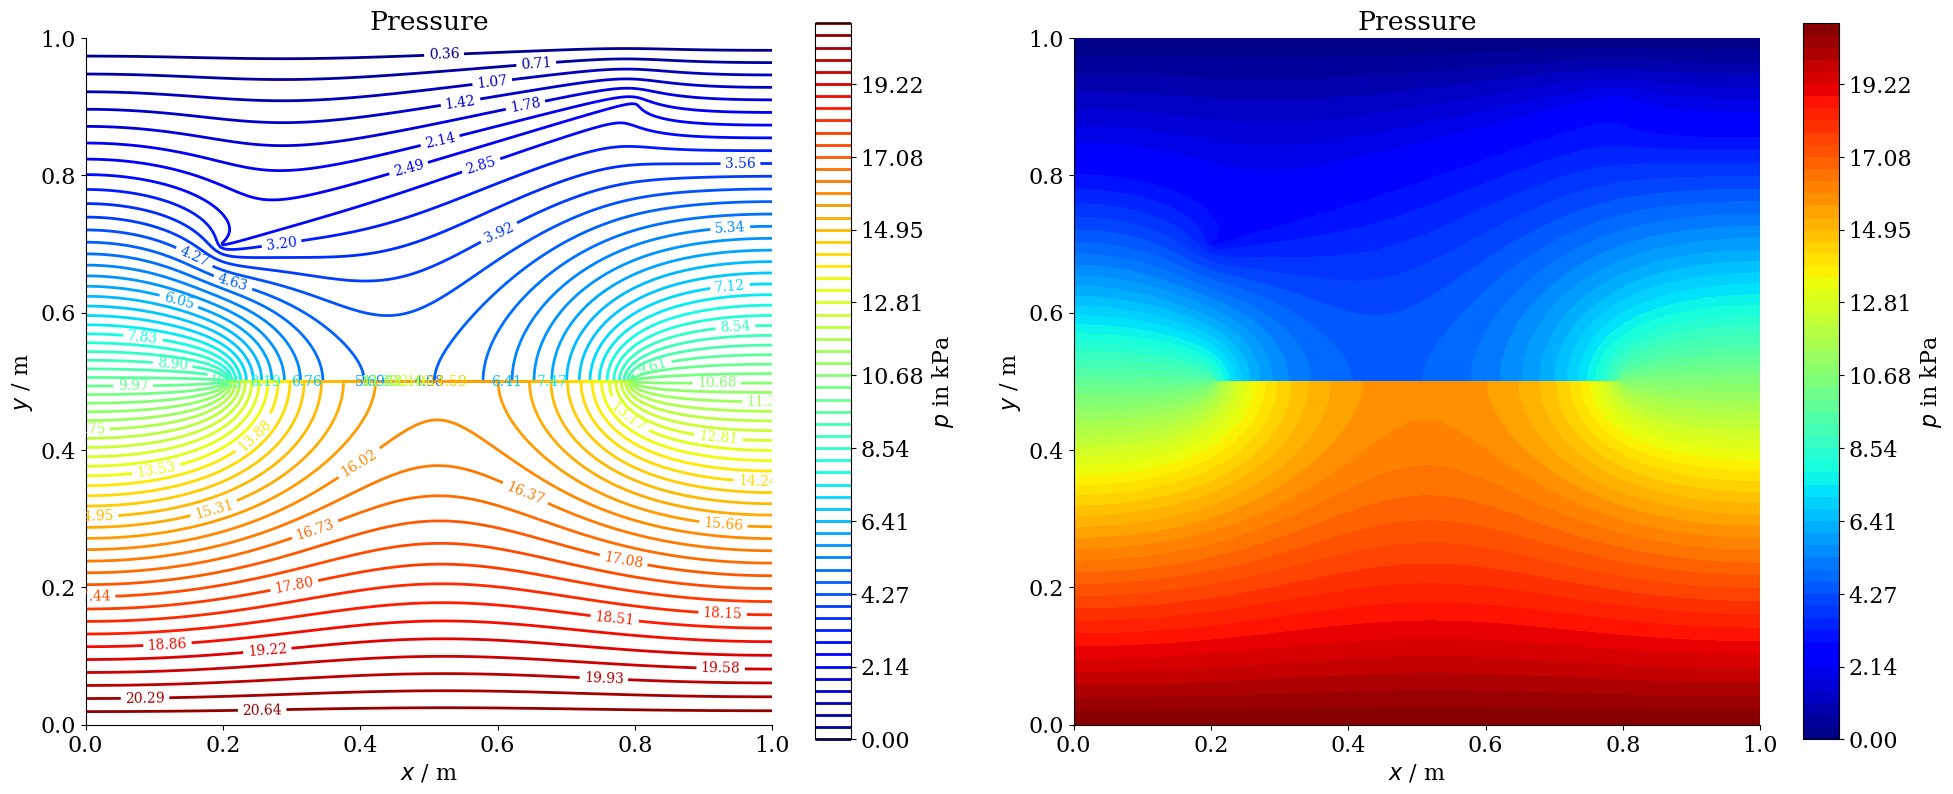

In [25]:
# Post-Processing
levels = np.linspace(np.min(field), np.max(field), 60)
levelsf = np.linspace(np.min(field), np.max(field), 60)

fig, ax = plt.subplots(ncols=2, figsize=(20, 8))
contour = ax[0].tricontour(triang, field, levels=levels, cmap=plt.cm.jet)

contourf = ax[1].tricontourf(triang, field, levels=levelsf, cmap=plt.cm.jet)
plt.clabel(contour, fontsize=10, inline=1)

fig.colorbar(contour, ax=ax[0], label="$p$ in kPa")
fig.colorbar(contourf, ax=ax[1], label="$p$ in kPa")

ax[0].set_title("Pressure")
ax[1].set_title("Pressure")

for i in range(2):
    ax[i].set_aspect("equal")
    ax[i].set_ylabel("$y$ / m")
    ax[i].set_xlabel("$x$ / m")
fig.tight_layout()

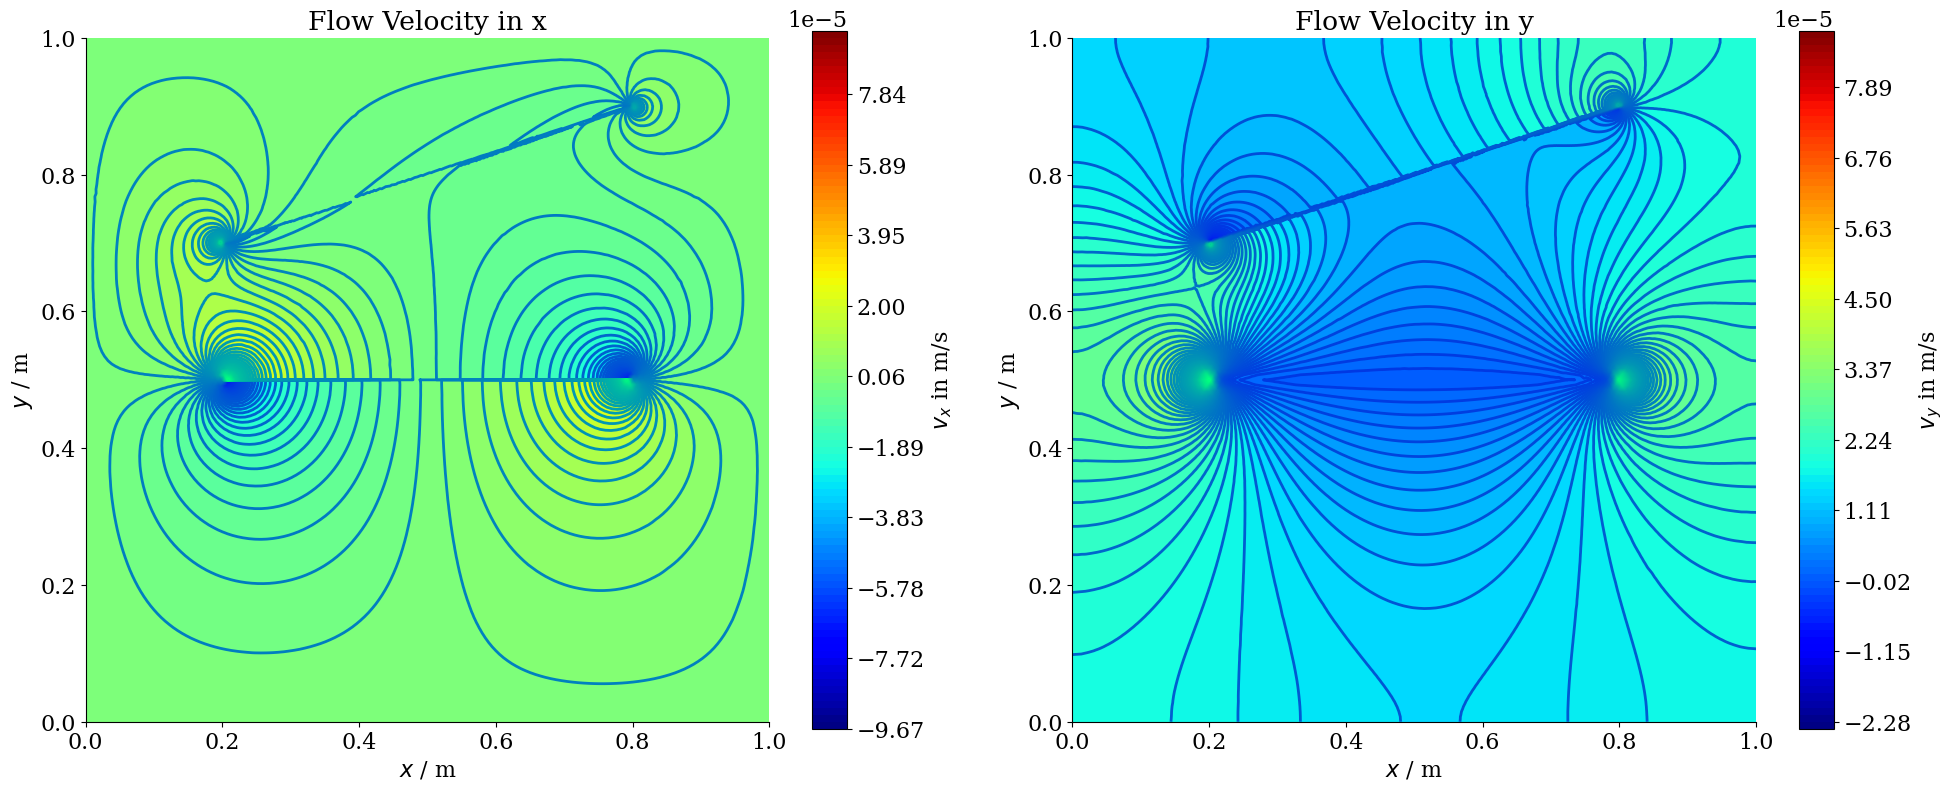

In [26]:
# Post-Processing (Velocities Fields in Conducting and Blocking Fracture)
levels_x = np.linspace(np.min(fieldx), np.max(fieldx), 100)
levels_y = np.linspace(np.min(fieldy), np.max(fieldy), 100)

fig, ax = plt.subplots(ncols=2, figsize=(20, 8))
contour_x = ax[0].tricontourf(triang, fieldx, levels=levels_x, cmap=plt.cm.jet)
contour_y = ax[1].tricontourf(triang, fieldy, levels=levels_y, cmap=plt.cm.jet)

contour = ax[0].tricontour(triang, fieldx, levels=levels_x, cmap=plt.cm.winter)
contour = ax[1].tricontour(triang, fieldy, levels=levels_y, cmap=plt.cm.winter)

fig.colorbar(contour_x, ax=ax[0], label="$v_x$ in m/s")
fig.colorbar(contour_y, ax=ax[1], label="$v_y$ in m/s")
ax[0].set_title("Flow Velocity in x")
ax[1].set_title("Flow Velocity in y")
for i in range(2):
    ax[i].set_aspect("equal")
    ax[i].set_ylabel("$y$ / m")
    ax[i].set_xlabel("$x$ / m")
fig.tight_layout()

In [27]:
# Calculate the magnitude of the velocity vector fieldlevels = np.linspace(np.min(field), np.max(field), 58)
vmag = np.sqrt(fieldx**2.0 + fieldy**2.0)

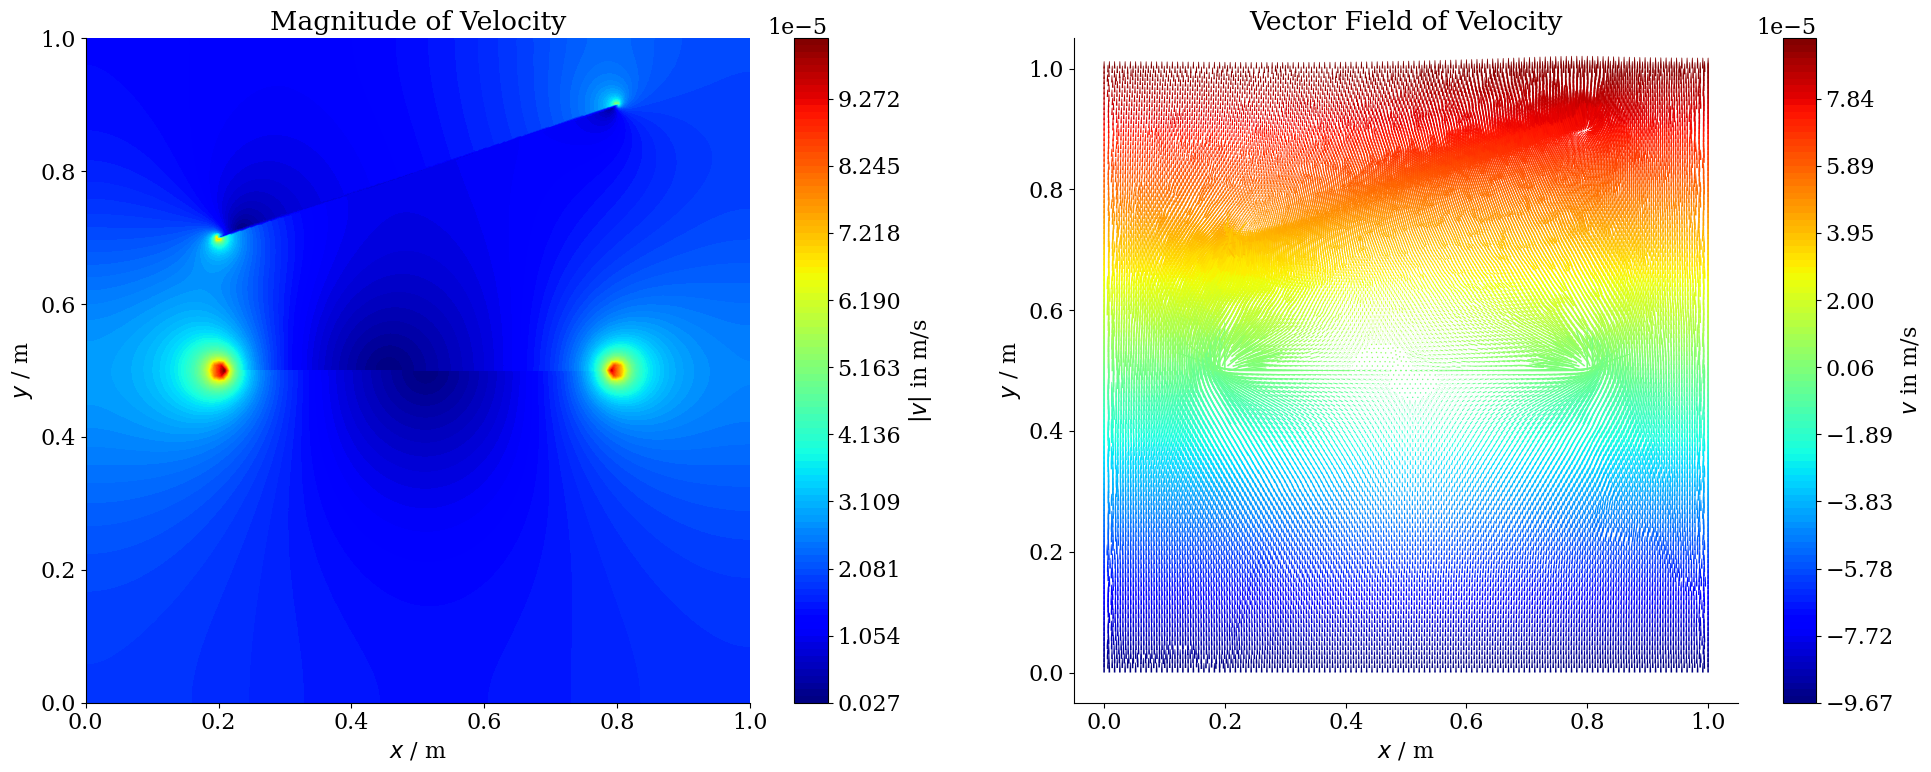

In [28]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

fig, ax = plt.subplots(ncols=2, figsize=(20, 8))

nz = mcolors.Normalize()
nz.autoscale(y)

levels = np.linspace(np.min(vmag), np.max(vmag), 100)
contourf = ax[0].tricontourf(triang, vmag, levels=levels, cmap=plt.cm.jet)
quiverf = ax[1].quiver(
    x,
    y,
    fieldx,
    fieldy,
    color=cm.jet(nz(y)),
    headwidth=0.45,
    scale=0.0012,
    headlength=0.35,
)

fig.colorbar(contourf, ax=ax[0], label="$|v|$ in m/s")
ax[0].set_title("Magnitude of Velocity")

fig.colorbar(contour_x, ax=ax[1], label="$v$ in m/s")
ax[1].set_title("Vector Field of Velocity")

for i in range(2):
    ax[i].set_aspect("equal")
    ax[i].set_ylabel("$y$ / m")
    ax[i].set_xlabel("$x$ / m")
    fig.tight_layout()

In [31]:
pvd_frac = vtuIO.PVDIO("fracture_block_conduct.pvd", dim=2)
line_05 = [(0.5, i, 0) for i in np.linspace(start=0.0, stop=1.0, num=500)]
lines = {"@ x=0.5": line_05}

slight changes of interpolated values if defaults are/were used.


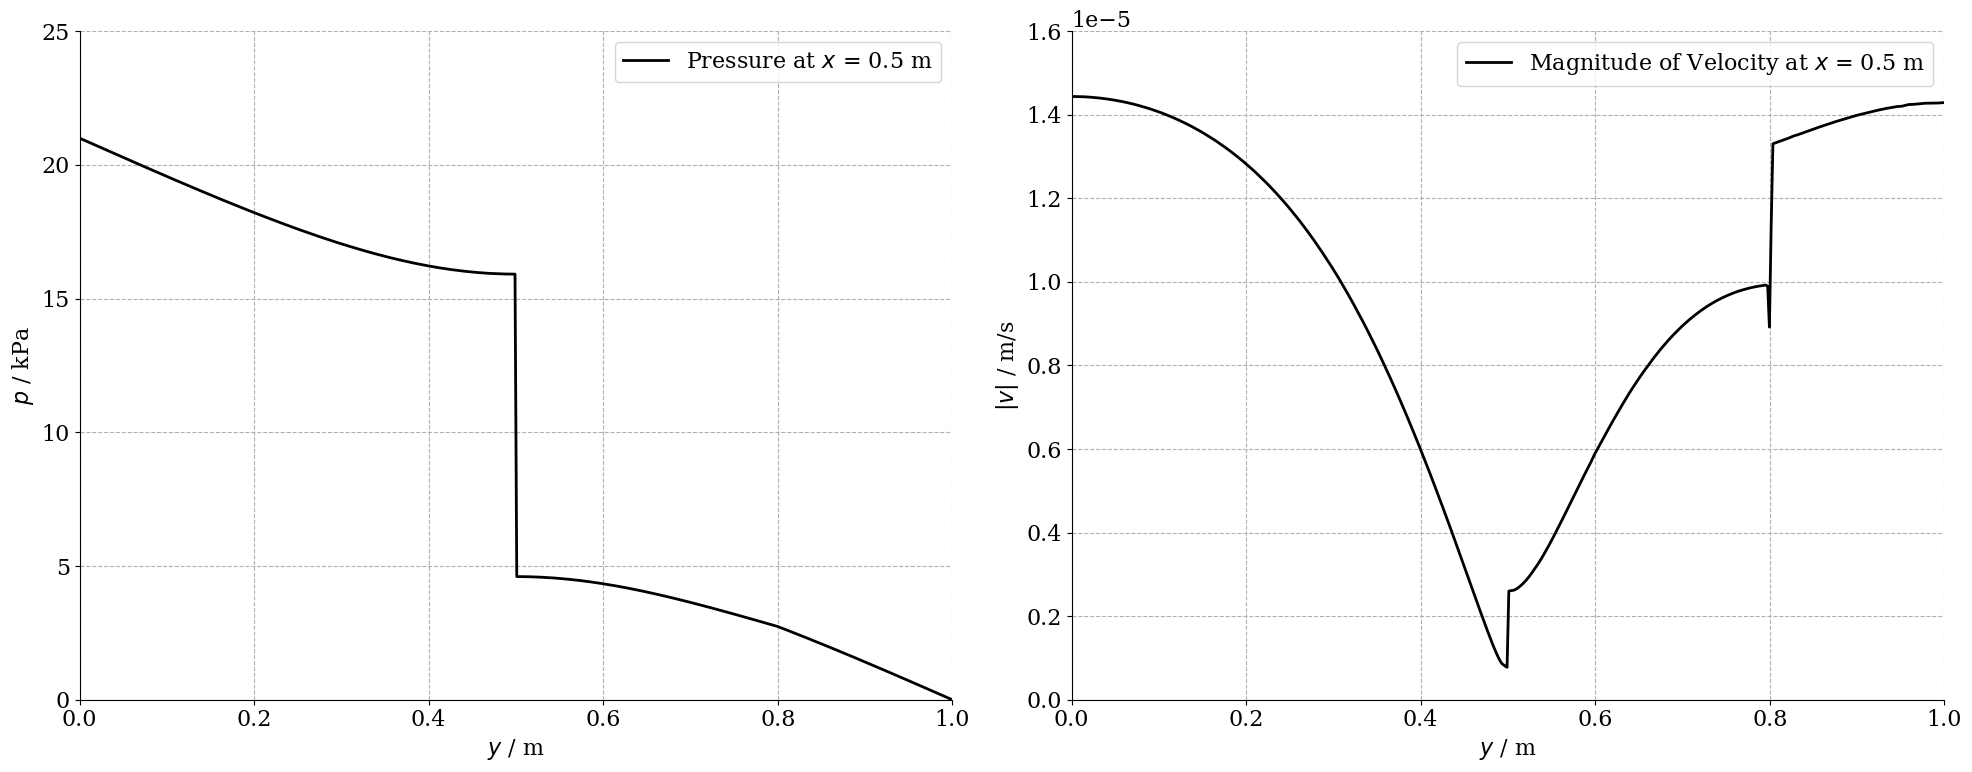

In [32]:
sns.set_palette("Paired", n_colors=10)
fig, ax = plt.subplots(ncols=2, figsize=(20, 8))
x = np.linspace(0, 1, 500)
for i in lines:
    velocity_x = pvd_frac.read_set_data(1, "v", pointsetarray=lines[i]).T[0]
    velocity_y = pvd_frac.read_set_data(1, "v", pointsetarray=lines[i]).T[1]
    pressure = (
        pvd_frac.read_set_data(1, "pressure", pointsetarray=lines[i]) / 1000.0
    )  # Converting pressure to kPa.
    velocity_magnitude = np.sqrt(velocity_x**2.0 + velocity_y**2.0)

    ax[0].plot(x, pressure, color="black", label="Pressure at $x$ = 0.5 m", ls="-")
    ax[0].axis(xmin=0.0, xmax=1.0)
    ax[0].axis(ymin=0.0, ymax=25)
    ax[0].grid(linestyle="dashed")

    ax[1].plot(
        x,
        velocity_magnitude,
        color="black",
        label="Magnitude of Velocity at $x$ = 0.5 m",
        ls="-",
    )
    ax[1].axis(xmin=0.0, xmax=1.0)
    ax[1].axis(ymin=0.0, ymax=1.6e-5)
    ax[1].grid(linestyle="dashed")

    ax[0].legend()
    ax[0].set_xlabel("$y$ / m")
    ax[0].set_ylabel("$p$ / kPa")

    ax[1].legend()
    ax[1].set_xlabel("$y$ / m")
    ax[1].set_ylabel("$|v|$ / m/s")
    fig.tight_layout()

# Conclusion

The current benchmark example shows how blocking and conducting fractures affect liquid flow pattern. For this aim, a 2D domain with a blocking fracture in the center and a conducting fracture in the upper half of the domain is assessed. The data are provided in terms of pressure and velocity. The pore pressure exhibits a jump across the central blocking fracture, thus leading to a discontinuous pressure field. The conducting fracture facilitates fluid flow. Its effect can be seen in the symmetry break of the solution (without the conducting fracture, pressure and velocity fields would be symmetric). Strong velocity gradients are observed in the vicinity of both fractures.

# References

[1] Zhou, C. B., Chen, Y. F., Hu, R., & Yang, Z. (2023). Groundwater flow through fractured rocks and seepage control in geotechnical engineering: <i>Theories and practices. Journal of Rock Mechanics and Geotechnical Engineering, 15(1) </i>, 1-36. https://doi.org/10.1016/j.jrmge.2022.10.001.


[2] Flemisch, B., et al. (2018). Benchmarks for single-phase flow in fractured porous media. <i>Advances in Water Resources, 111</i>, 239-258. https://doi.org/10.1016/j.advwatres.2017.10.036.


[3] de Borst, R. (2017). Fluid flow in fractured and fracturing porous media: A unified view. <i>Mechanics Research Communications, 80</i>, 47-57. https://doi.org/10.1016/j.mechrescom.2016.05.004.
